# Лабораторная работа №5 — вариант 3





In [1]:

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple
np.random.seed(42)


In [2]:

# Генерация данных
a, b, c, d = 0.3, 0.3, 0.07, 0.3
n_inputs = 10  
N_total = 2000  
train_frac = 0.7

t = np.linspace(0, 40, N_total)
y = a*np.sin(b*t) + c*(t**2) + d*t

X=[]
Y=[]
for i in range(N_total-n_inputs):
    X.append(y[i:i+n_inputs])
    Y.append(y[i+n_inputs])

X=np.array(X)
Y=np.array(Y)

split=int(len(X)*train_frac)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

print("Форматы:", X_train.shape, Y_train.shape)


Форматы: (1393, 10) (1393,)


In [3]:

# Реализация 5: нативная MLP (numpy)
class NumpyMLP:
    def __init__(self, n_in, n_hidden, lr=1e-3):
        self.W1 = np.random.randn(n_hidden, n_in) * 0.1
        self.b1 = np.zeros((n_hidden, 1))
        self.W2 = np.random.randn(1, n_hidden) * 0.1
        self.b2 = np.zeros((1, 1))
        self.lr = lr

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def sigmoid_deriv(self, s):
        return s*(1-s)

    def forward(self, x):
        z1 = x.dot(self.W1.T) + self.b1.T
        a1 = self.sigmoid(z1)
        z2 = a1.dot(self.W2.T) + self.b2.T
        out = z2[:,0]
        return out, (x,z1,a1,z2)

    def compute_loss(self,pred,y):
        return np.mean((pred-y)**2)

    def backward(self, cache, pred, y):
        x,z1,a1,z2 = cache
        m = x.shape[0]
        dloss_dz2 = (2/m)*(pred-y).reshape(-1,1)
        dW2 = dloss_dz2.T.dot(a1)
        db2 = np.sum(dloss_dz2,axis=0,keepdims=True)

        da1 = dloss_dz2.dot(self.W2)
        dz1 = da1*self.sigmoid_deriv(a1)

        dW1 = dz1.T.dot(x)
        db1 = np.sum(dz1,axis=0,keepdims=True).T

        self.W2 -= self.lr*dW2
        self.b2 -= self.lr*db2.T
        self.W1 -= self.lr*dW1
        self.b1 -= self.lr*db1

    def fit(self,X,Y,epochs=500,batch_size=32):
        history=[]
        for ep in range(epochs):
            idx=np.random.permutation(len(X))
            Xs,Ys=X[idx],Y[idx]
            for i in range(0,len(X),batch_size):
                xb=xs= Xs[i:i+batch_size]
                yb=Ys[i:i+batch_size]
                pred,cache=self.forward(xb)
                self.backward(cache,pred,yb)
            pred_all,_=self.forward(X)
            loss=self.compute_loss(pred_all,Y)
            history.append(loss)
            if ep%100==0:
                print("Epoch",ep,"Loss:",loss)
        return history

    def predict(self,X):
        pred,_=self.forward(X)
        return pred

model_np = NumpyMLP(n_inputs,4,lr=1e-3)
history_np = model_np.fit(X_train,Y_train,epochs=500)

pred_train_np=model_np.predict(X_train)
df_train_np=pd.DataFrame({
    "y_true":Y_train,
    "y_pred":pred_train_np,
    "diff":pred_train_np-Y_train
})
df_train_np.head(20)


Epoch 0 Loss: 715.0282332017513
Epoch 100 Loss: 342.4736980671864
Epoch 200 Loss: 298.4983746585375
Epoch 300 Loss: 175.14538163953605
Epoch 400 Loss: 356.7847590286097


,y_true,y_pred,diff
0,0.080831,21.564463,21.483632
1,0.089220,21.561152,21.471932
2,0.097664,21.558927,21.461263
3,0.106164,21.557758,21.451594
4,0.114718,21.557613,21.442894
5,0.123328,21.558459,21.435131
6,0.131993,21.560263,21.428270
7,0.140713,21.562991,21.422278
8,0.149488,21.566608,21.417120
9,0.158318,21.571080,21.412762


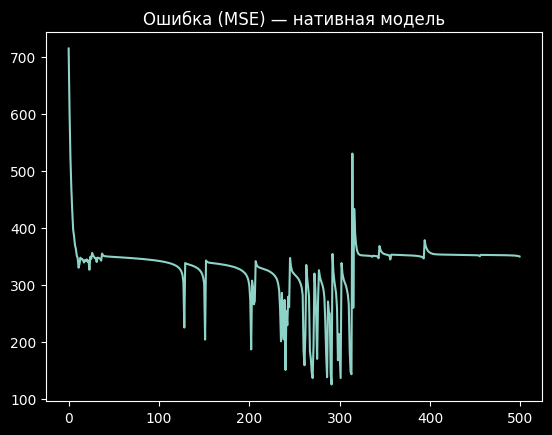

/tmp/ipykernel_3579923/1322442499.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


,y_true,y_pred,diff
0,63.845676,22.920687,-40.924989
1,63.929380,22.920687,-41.008693
2,64.013131,22.920687,-41.092444
3,64.096929,22.920687,-41.176242
4,64.180774,22.920687,-41.260087
5,64.264666,22.920687,-41.343979
6,64.348606,22.920687,-41.427919
7,64.432592,22.920687,-41.511905
8,64.516626,22.920687,-41.595938
9,64.600706,22.920687,-41.680019


In [4]:

plt.plot(history_np)
plt.title("Ошибка (MSE) — нативная модель")
plt.show()

pred_test_np=model_np.predict(X_test)
df_test_np=pd.DataFrame({
    "y_true":Y_test,
    "y_pred":pred_test_np,
    "diff":pred_test_np-Y_test
})
df_test_np.head(20)


Epoch 0 Loss: 870.7108764648438
Epoch 50 Loss: 848.70703125
Epoch 100 Loss: 841.0775146484375
Epoch 150 Loss: 834.0642700195312
Epoch 200 Loss: 827.266845703125
Epoch 250 Loss: 820.6094970703125


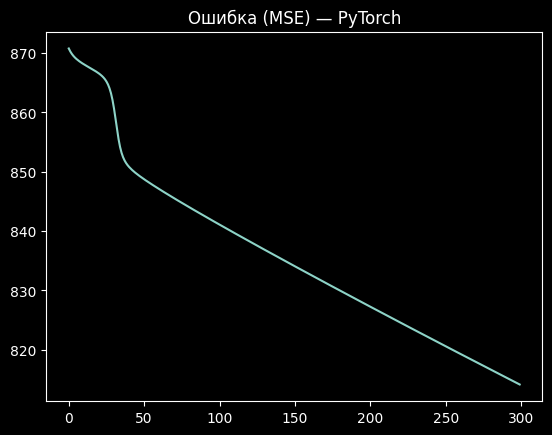

,y_true,y_pred,diff
0,63.845676,1.327863,-62.517813
1,63.929380,1.327863,-62.601517
2,64.013131,1.327863,-62.685268
3,64.096929,1.327863,-62.769066
4,64.180774,1.327863,-62.852911
5,64.264666,1.327863,-62.936803
6,64.348606,1.327863,-63.020743
7,64.432592,1.327863,-63.104729
8,64.516626,1.327863,-63.188763
9,64.600706,1.327863,-63.272843


In [5]:

# PyTorch модель
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(0)

X_train_t=torch.tensor(X_train,dtype=torch.float32)
Y_train_t=torch.tensor(Y_train,dtype=torch.float32).unsqueeze(1)
X_test_t=torch.tensor(X_test,dtype=torch.float32)
Y_test_t=torch.tensor(Y_test,dtype=torch.float32).unsqueeze(1)

class TorchMLP(nn.Module):
    def __init__(self,n_in,n_hidden):
        super().__init__()
        self.fc1=nn.Linear(n_in,n_hidden)
        self.act=nn.Sigmoid()
        self.fc2=nn.Linear(n_hidden,1)
    def forward(self,x):
        return self.fc2(self.act(self.fc1(x)))

model_t=TorchMLP(n_inputs,4)
opt=optim.Adam(model_t.parameters(),lr=1e-3)
loss_fn=nn.MSELoss()

hist_t=[]
for ep in range(300):
    opt.zero_grad()
    out=model_t(X_train_t)
    loss=loss_fn(out,Y_train_t)
    loss.backward()
    opt.step()
    hist_t.append(loss.item())
    if ep%50==0:
        print("Epoch",ep,"Loss:",loss.item())

plt.plot(hist_t)
plt.title("Ошибка (MSE) — PyTorch")
plt.show()

pred_test_t=model_t(X_test_t).detach().numpy().squeeze()
df_test_t=pd.DataFrame({
    "y_true":Y_test,
    "y_pred":pred_test_t,
    "diff":pred_test_t-Y_test
})
df_test_t.head(20)
